In [19]:
import numpy as np 
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize,to_categorical,plot_model
from keras.regularizers import l2

In [20]:
data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = data
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


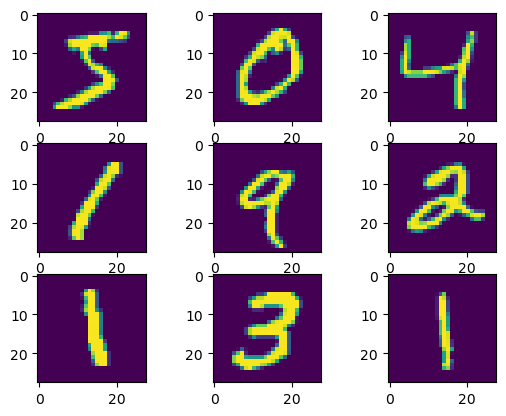

In [21]:
fig, axs = plt.subplots(3, 3)
n = 0
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_train[n])
        n += 1

In [22]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [23]:
print(y_train.shape)

(60000,)


In [24]:
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

In [25]:
print(y_train.shape)

(60000,)


In [26]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [27]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(256, kernel_regularizer=l2(0.001),activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_2"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
plot_model(model, to_file='plot-mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
model.fit(X_train, y_train_c, epochs=25,batch_size=256)

Epoch 1/25
235/235 [==============================] - 2s 5ms/step - loss: 0.7149 - accuracy: 0.8745
Epoch 2/25
235/235 [==============================] - 1s 5ms/step - loss: 0.3769 - accuracy: 0.9307
Epoch 3/25
235/235 [==============================] - 1s 5ms/step - loss: 0.3112 - accuracy: 0.9424
Epoch 4/25
235/235 [==============================] - 1s 5ms/step - loss: 0.2752 - accuracy: 0.9503
Epoch 5/25
235/235 [==============================] - 1s 5ms/step - loss: 0.2537 - accuracy: 0.9549
Epoch 6/25
235/235 [==============================] - 1s 5ms/step - loss: 0.2366 - accuracy: 0.9583
Epoch 7/25
235/235 [==============================] - 1s 5ms/step - loss: 0.2230 - accuracy: 0.9613
Epoch 8/25
235/235 [==============================] - 1s 5ms/step - loss: 0.2124 - accuracy: 0.9638
Epoch 9/25
235/235 [==============================] - 1s 5ms/step - loss: 0.2027 - accuracy: 0.9657
Epoch 10/25
235/235 [==============================] - 1s 5ms/step - loss: 0.1942 - accuracy: 0.9674

In [31]:
loss, accuracy = model.evaluate(X_test, y_test_c)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1512 - accuracy: 0.9728
0.15120819211006165
0.9728000164031982


In [32]:
prediction = model.predict([X_test])

313/313 [==============================] - 1s 2ms/step


In [33]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


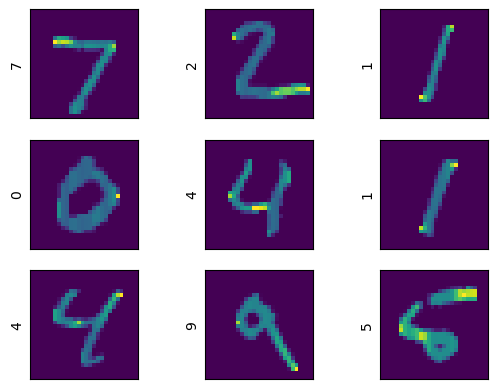

In [34]:
fig, axs = plt.subplots(3, 3)
n = 0
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_test[n])
        axs[i,j].set(xticks=[], yticks=[])
        axs[i,j].set_ylabel(np.argmax(prediction[n]),color='black' )
        n += 1

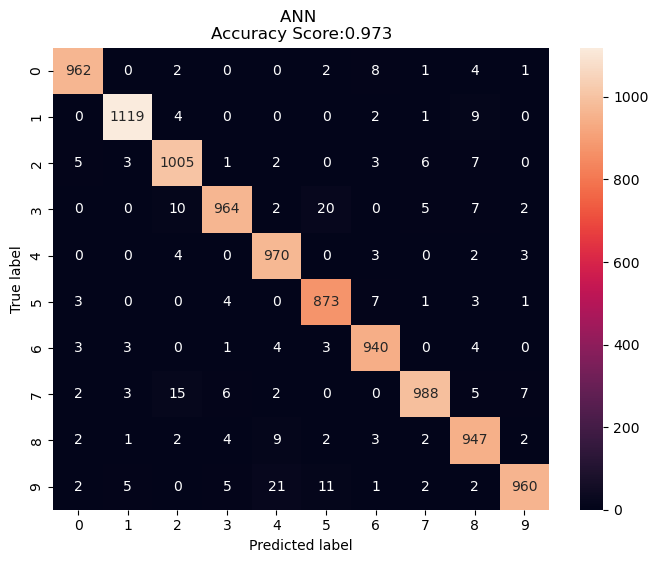

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_test_c.argmax(axis=1), prediction.argmax(axis=1))
cm_df = pd.DataFrame(cm,
                    index = np.unique(y_train), 
                    columns = np.unique(y_train))

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('ANN \nAccuracy Score:{0:.3f}'.format(accuracy_score(y_test_c.argmax(axis=1), prediction.argmax(axis=1))))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()